# <center> Spring 2022 CS559 Project 1: Classification of Circles: Linear Transformation Classification of Unsupervised Learning </center>
## <center> Due: 3/4/2022 11:59 PM </center>

<b>Objective</b>: In this project, students are going to train a linear classification model with the given training set and regularize the model using the given test set. 

When the training data is plotted, the plot will show three circles. The objective is to test where each observation in the test data set will belong to which circle using linear classifiers. Unfortunately, the label of circles are not unknown so we have to assign the circle ID using the clustering techniques. We will use KMeans and the found cluster ID will be the circle ID. Once the circles are all clustered properly, we can make models that classifies the circle and regularize the model using the test data set. 

<b>Note</b>: 
1. This project is an individual project and students are not allowed to work together. For any evidences, the project will mark 0 and will report to the University. Students are not allowed to use outside resources directly (no direct copies of work, code, etc.). 
2. Students are allowed to use any built-in functions or make functions.
3. Students are allowed to make any visualizations. 

<b>Data</b>: Two datasets are given and they are training and test sets. 
1. They are completed - no missing values. 
2. No labels. 
3. Non-linear. 

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./CS559_S22_train.csv')
df_train = df_train.drop("Unnamed: 0",axis=1)

df_test = pd.read_csv('./CS559_S22_test.csv')
df_test = df_test.drop("Unnamed: 0",axis=1)

In [3]:
df_train.head()

,0,1
0,1.990883,-0.403233
1,-3.853454,-1.252172
2,3.887177,2.267125
3,-3.475760,1.592513
4,0.663024,-1.520762


In [4]:
import matplotlib.pyplot as plt

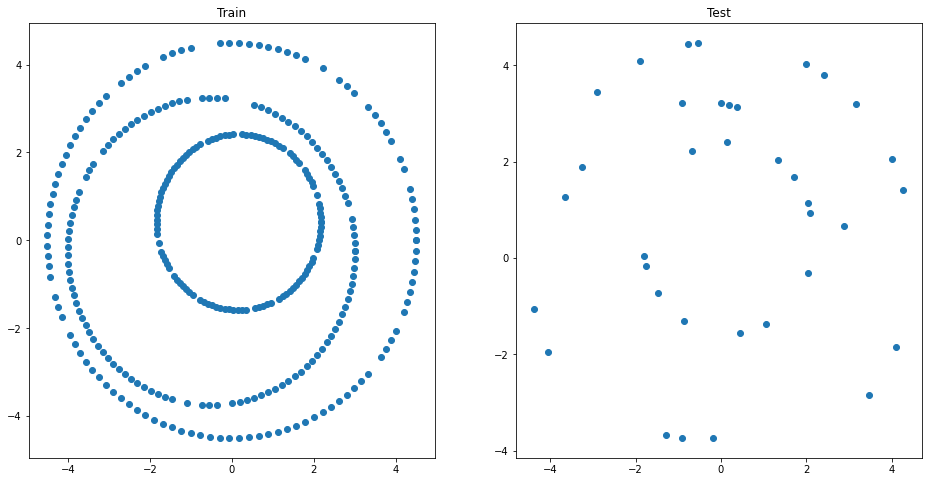

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1])
ax1.set_title('Train')
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1])
ax2.set_title('Test')
plt.show()

# Task1: Clustering - Checking [10 pts]
Run KMeans and verify the clustering result. Did cluster IDs assign to each circle correctly? 

Build a linear classification model using `sklearn` to classify the the cluster IDs using Logistic Regression and KNN. When you use KNN, use different neighbor numbers [1, 10, 50, 100].

Report the accuracy of each model using `accuracy_score`. 

Explain why KMeans did not cluster by the circle and evaluate the model.

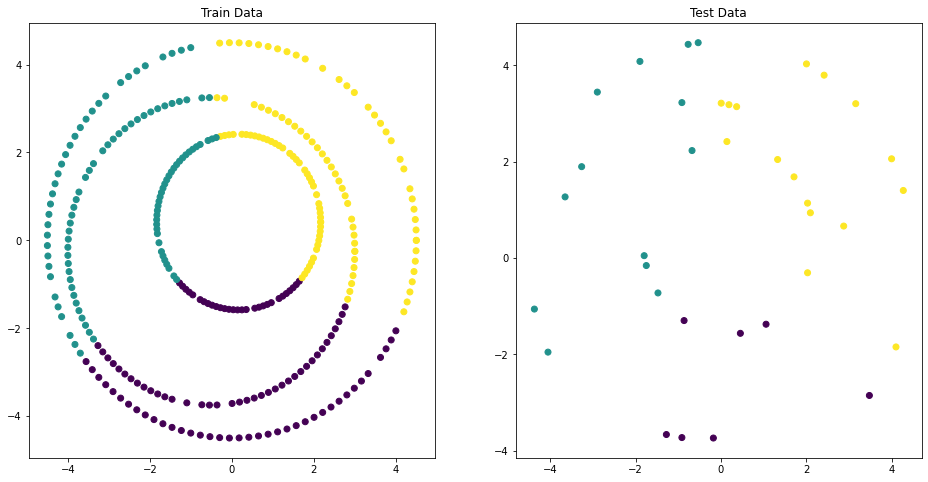

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
# Plotting result of KMeans

km.fit(df_train)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1], c = km.predict(df_train))
ax1.set_title('Train Data')
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1], c = km.predict(df_test))
ax2.set_title('Test Data')

kmResultTrain = km.predict(df_train)
kmResultTest = km.predict(df_test)

In [7]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in [1, 10, 50, 100]:
    KnnModel = KNeighborsClassifier(n_neighbors=i)
    KnnModel.fit(df_train,kmResultTrain)
    print("Accuracy of KNN at k =",i,"is", "{:.2f}".format(accuracy_score(KnnModel.predict(df_train),kmResultTrain)*100),"%")
    
LogModel = LogisticRegression(random_state=0).fit(df_train, kmResultTrain)
print("Accuracy of Logistic regression =","{:.2f}".format(accuracy_score(LogModel.predict(df_train),kmResultTrain)*100),"%")

Accuracy of KNN at k = 1 is 100.00 %
Accuracy of KNN at k = 10 is 98.77 %
Accuracy of KNN at k = 50 is 98.46 %
Accuracy of KNN at k = 100 is 99.07 %
Accuracy of Logistic regression = 100.00 %


# Task 2: New Training Data
Perform feature engineering to make a new traning data set so it can train KMeans cluster so it can cluster each circle. Explain the workflow. Remember that EDA is not necessary. 

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_train)
principalComponents = pca.fit_transform(df_train)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_train)
scaledTrainData = scaler.transform(df_train)
scaledTestData = scaler.transform(df_test)

# Task 3: Re-cluster using the new training set.
Do the clustering again and observe if each circle its owns cluster ID.  Evaluate the feature engineering work. 

Text(0.5, 1.0, 'Test Data')

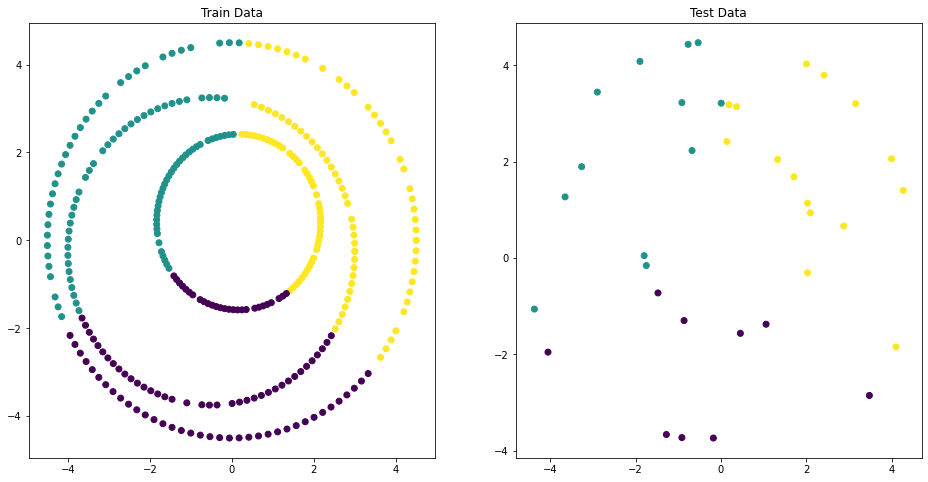

In [10]:
# PCA does not change the clustering

km = KMeans(n_clusters=3)
km.fit(principalComponents)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1], c = km.predict(principalComponents))
ax1.set_title('Train Data')
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1], c = km.predict(pca.transform(df_test)))
ax2.set_title('Test Data')

Text(0.5, 1.0, 'Test Data')

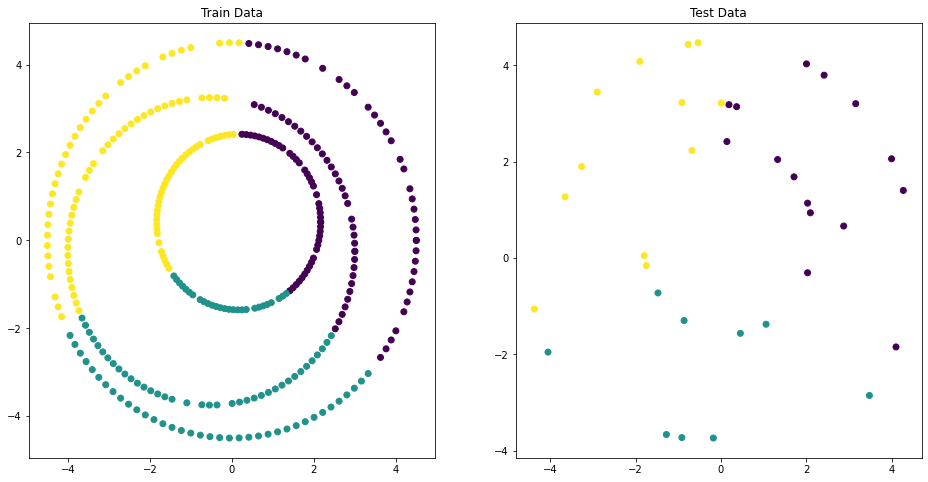

In [11]:
# Scaling also does not change the clustering

km = KMeans(n_clusters=3)
km.fit(scaledTrainData)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1], c = km.predict(scaledTrainData))
ax1.set_title('Train Data')
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1], c = km.predict(scaledTestData))
ax2.set_title('Test Data')

Text(0.5, 1.0, 'Test Data')

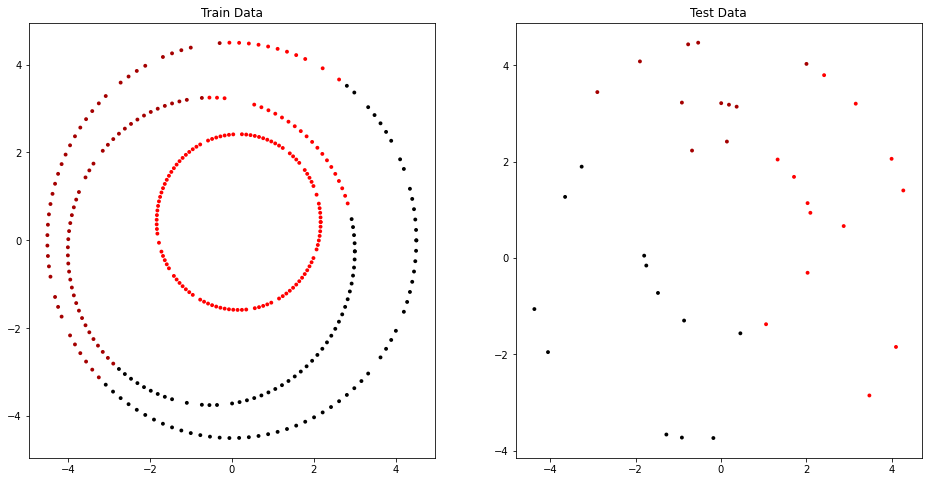

In [12]:
# Spectral clustering comes very close to circular clustering

import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
labels = model.fit_predict(df_train)
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1], s=15, linewidth=0, c=labels, cmap='flag')
ax1.set_title('Train Data')
labels = model.fit_predict(df_test)
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1], s=15, linewidth=0, c=labels, cmap='flag')
ax2.set_title('Test Data')

C:\Users\Asus\.conda\envs\ml\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'Test Data ')

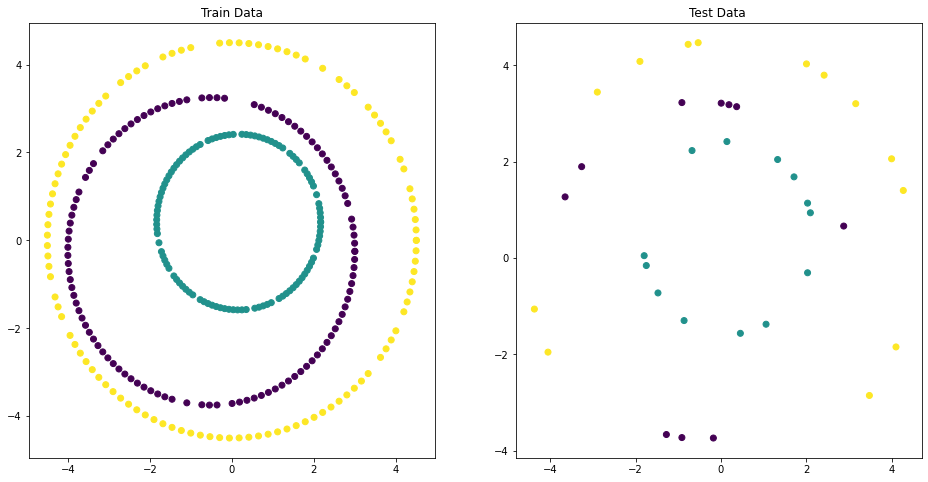

In [13]:
# Since splitting the data yeilds 

spectData = df_train.copy()
spectData = spectData.append(df_test)

spec_cl = skl_cluster.SpectralClustering(
    n_clusters=3,  
    n_neighbors=3, 
    affinity='nearest_neighbors')

cluster = spec_cl.fit_predict(spectData)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1], c = cluster[0:len(df_train)])
ax1.set_title('Train Data')
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1], c = cluster[len(df_train):])
ax2.set_title('Test Data ')

# Task 4: Train the linear classification models
Use Logistic Regression, Perceptron, and LDA to classify the clucter ID (the circle). Present the performance of training models and evaluate individual models.

In [14]:
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

trainLabels = cluster[0:len(df_train)]
testLabels = cluster[len(df_train):]

lda = LDA(n_components=2)
X_train = lda.fit_transform(df_train, trainLabels)
X_test = lda.transform(df_test)

LogModel = LogisticRegression(random_state=18)
LogModel.fit(df_train, trainLabels)
print("Accuracy of Logistic regression =","{:.2f}".format(accuracy_score(LogModel.predict(df_train),trainLabels)*100),"%")

p = Perceptron(random_state=18)
p.fit(df_train, trainLabels)
print("Accuracy of Perceptron =","{:.2f}".format(accuracy_score(p.predict(df_train),trainLabels)*100),"%")

Accuracy of Logistic regression = 36.42 %
Accuracy of Perceptron = 31.17 %


### Task 5: Guess the accuracy of KNN
Based on the work from Task 1, guess how KNN would perform on new training data set. Do you think the accuracy will increase or decrease. Explain why.

In [15]:
for i in [1, 10, 50, 100]:
    KnnModel = KNeighborsClassifier(n_neighbors=i)
    KnnModel.fit(df_train,trainLabels)
    print("Accuracy of KNN at k =",i,"is", "{:.2f}".format(accuracy_score(KnnModel.predict(df_train),trainLabels)*100),"%")

Accuracy of KNN at k = 1 is 100.00 %
Accuracy of KNN at k = 10 is 94.14 %
Accuracy of KNN at k = 50 is 59.88 %
Accuracy of KNN at k = 100 is 46.91 %


# Task 6: Regularization
Predict the cluster ID on the test data set. Visualize the result to show that each observation belongs to the same circle from the training data set. 

Accuracy of KNN at k = 10 is 94.44 %


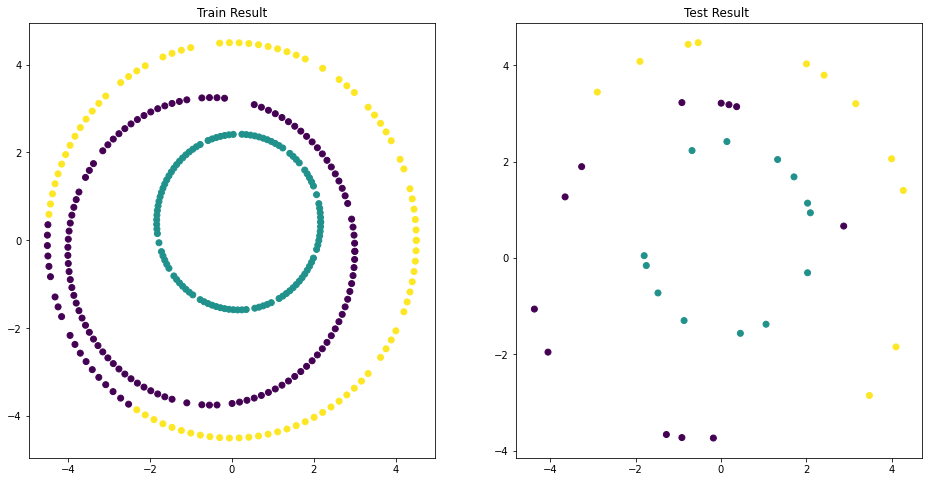

In [16]:
# Since KNN accuracy for k=10 was ideal we will use that model.

KnnModel = KNeighborsClassifier(n_neighbors=10)
KnnModel.fit(df_train,trainLabels)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.scatter(df_train.iloc[:,0],df_train.iloc[:,1], c = KnnModel.predict(df_train))
ax1.set_title('Train Result')
ax2.scatter(df_test.iloc[:,0],df_test.iloc[:,1], c = KnnModel.predict(df_test))
ax2.set_title('Test Result ')

print("Accuracy of KNN at k =",10,"is", "{:.2f}".format(accuracy_score(KnnModel.predict(df_test),testLabels)*100),"%")

# Task 7: Summary
Summarize your work and what you learned from this project. 